 ##### Importing Required Libraries 

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

##### Importing the dataset in a variable and defining training sizes

In [6]:
linear_regression = pd.read_csv('Training_curve_data.csv')

train_sizes=[1,50,500,750,1000,1500,2000,2500]

##### Defining features and target variable 

In [7]:
features=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19']
target = 'Overall satisfaction'

#### Selecting the Model for running the learning curve

In [8]:
train_sizes,train_scores,validation_scores=learning_curve(
estimator=LinearRegression(),
X=linear_regression[features],
y=linear_regression[target],train_sizes=train_sizes,cv=5,
scoring='neg_mean_squared_error')

#### In order to see what learning curve returns 

In [9]:
print('Training scores:\n\n', train_scores)
print('\n', '__' * 70) 
print('\n Validation scores:\n\n', validation_scores)

Training scores:

 [[-0.         -0.         -0.         -0.         -0.        ]
 [-0.01886958 -0.00019157 -0.00019157 -0.00019157 -0.00019157]
 [-0.02752375 -0.00640956 -0.00640956 -0.00640956 -0.00640956]
 [-0.02905194 -0.00689933 -0.00971102 -0.00971102 -0.00971102]
 [-0.02938951 -0.01444757 -0.01585753 -0.01585753 -0.01585753]
 [-0.02890405 -0.02041536 -0.02208906 -0.02187388 -0.02187388]
 [-0.03361501 -0.03063513 -0.03089295 -0.02410155 -0.02410155]
 [-0.03459784 -0.0332329  -0.03359424 -0.03074971 -0.02711473]]

 ____________________________________________________________________________________________________________________________________________

 Validation scores:

 [[-0.01479821 -0.18038126 -0.1714669  -0.45626686 -0.7752001 ]
 [-0.0743834  -0.20696696 -0.15948491 -0.42234253 -0.61245629]
 [-0.01963828 -0.07305733 -0.05765628 -0.20082594 -0.33845791]
 [-0.01785566 -0.06525632 -0.04331904 -0.15674122 -0.28564743]
 [-0.01659787 -0.04442126 -0.03255398 -0.09542444 -0.16825

#### Taking the mean value of each row and also flip the signs of the error scores

In [10]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20)
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000
50      0.003927
500     0.010632
750     0.013017
1000    0.018282
1500    0.023031
2000    0.028669
2500    0.031858
dtype: float64

 --------------------

Mean validation scores

 1       0.319623
50      0.295127
500     0.137927
750     0.113764
1000    0.071450
1500    0.058112
2000    0.058543
2500    0.046603
dtype: float64


#### Plotting the learning curves using a regular matplotlib workflow

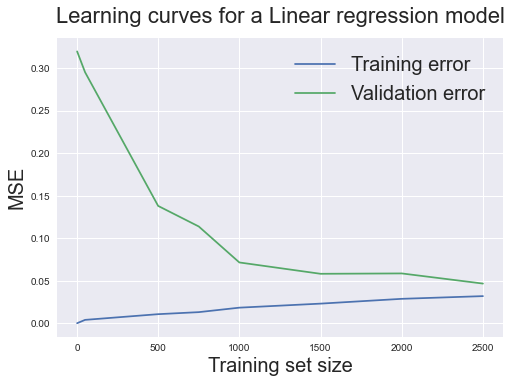

In [12]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 20)
plt.xlabel('Training set size', fontsize = 20)
plt.title('Learning curves for a Linear regression model', fontsize = 22, y = 1.03)
plt.legend(fontsize=20)